### Logistic Regression

##### Importing the dataset

In [2]:
import pandas as pd

dataset = pd.read_csv(r"D:\Sushmitha\Susuhmi\Social_ads.csv")

### Exploratory Data Analysis (EDA)

##### Explore the dataset

In [4]:
dataset.head()  

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
print(dataset.shape)

(400, 3)


In [6]:
print(dataset.columns)	

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [7]:
print(dataset.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


In [8]:
print(dataset.isnull().sum())

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [9]:
print(dataset.describe()) 

              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


### Data Visualization

In [10]:
import matplotlib.pyplot as plt

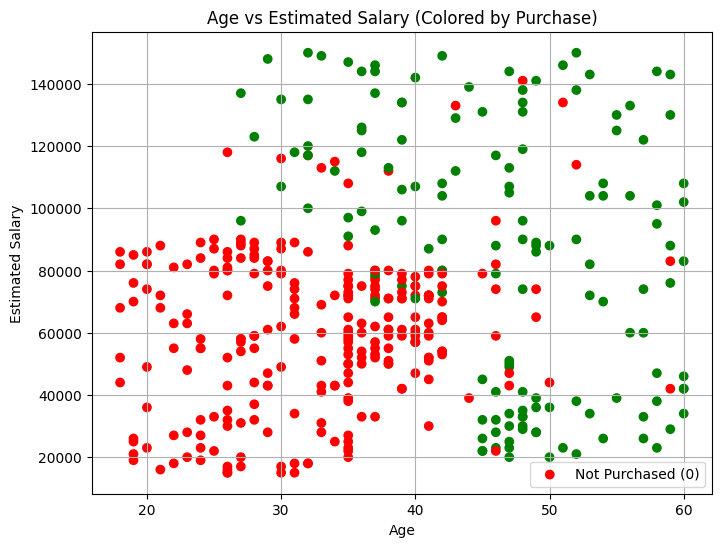

In [11]:
colors = ['red' if p == 0 else 'green' for p in dataset['Purchased']]

plt.figure(figsize=(8, 6))
plt.scatter(dataset['Age'], dataset['EstimatedSalary'], c=colors)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs Estimated Salary (Colored by Purchase)')
plt.legend(['Not Purchased (0)', 'Purchased (1)'])
plt.grid(True)
plt.show()

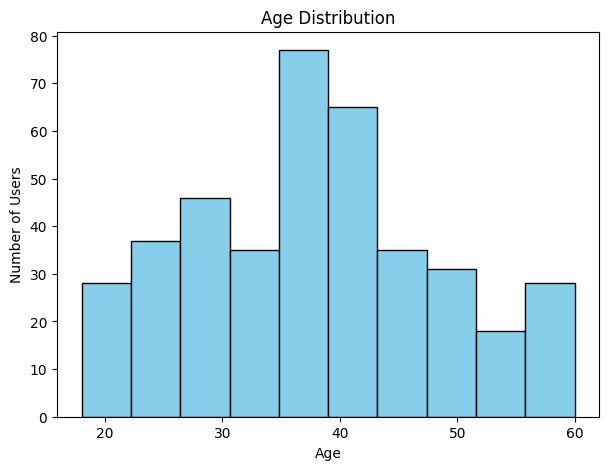

In [12]:
plt.figure(figsize=(7, 5))
plt.hist(dataset['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Age Distribution')
plt.show()

## Model Building

#### Selecting Feature and Target

In [13]:
X = dataset[['Age', 'EstimatedSalary']] 
y = dataset['Purchased'] 

In [14]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

### Split the dataset into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [17]:
dataset.shape

(400, 3)

In [18]:
X_train.shape

(320, 2)

In [19]:
X_test.shape

(80, 2)

### Feature Scaling (Scaling the feature columns)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
print("Scaled X_train:\n", X_train_scaled[:5])
print("\nScaled X_test:\n", X_test_scaled[:5])

Scaled X_train:
 [[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]]

Scaled X_test:
 [[-0.79895082  0.49460758]
 [-0.02126485 -0.57735906]
 [-0.31289709  0.14694273]
 [-0.79895082  0.26283101]
 [-0.31289709 -0.57735906]]


### Training the Logistic Regression model on the Training set

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

### Make Predictions with Test Data

In [23]:
y_pred = model.predict(X_test_scaled)

print("Actual Output:\n", y_test[:5])
print("\nPredicted Output:\n", y_pred[:5])

Actual Output:
 132    0
309    0
341    0
196    0
246    0
Name: Purchased, dtype: int64

Predicted Output:
 [0 0 0 0 0]


## Evaluating the Model

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,y_pred)
accuracy_score = accuracy_score(y_test,y_pred)

print("\nModel Evaluation:")
print(f"Accuracy Score: {accuracy_score:.2f}")
print(f"\nConfusion Matrix: \n{cm}")


Model Evaluation:
Accuracy Score: 0.93

Confusion Matrix: 
[[57  1]
 [ 5 17]]


#### Making prediction for new data

In [25]:
new_data = pd.DataFrame({
    'Age': [25, 48],               
    'EstimatedSalary': [30000, 72000], 
})

new_data

,Age,EstimatedSalary
0,25,30000
1,48,72000


### Ensuring New Data Matches Training Data Structure

In [26]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.28500455, -1.15680049],
       [ 0.95084261,  0.06002651]])

### Make predictions

In [27]:
new_predictions = model.predict(new_data_scaled)
new_predictions

array([0, 1])

### Display predictions

In [28]:
print("Predicted Results:")
for i, prediction in enumerate(new_predictions):
    if prediction == 1:
        result = "Yes (likely to click on the advertisement)"
    else:
        result = "No (unlikely to click on the advertisement)"
    
    print(f"Predicted Result {i+1}: {result}")   

Predicted Results:
Predicted Result 1: No (unlikely to click on the advertisement)
Predicted Result 2: Yes (likely to click on the advertisement)


In [29]:
a = [10,20, 30]
for i,num in enumerate(a):
    print('i:',i, ' a:',a[i])
    print()

i: 0  a: 10

i: 1  a: 20

i: 2  a: 30

